In [69]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv('data/BAJFINANCE.csv', on_bad_lines = "skip")

In [71]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [72]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

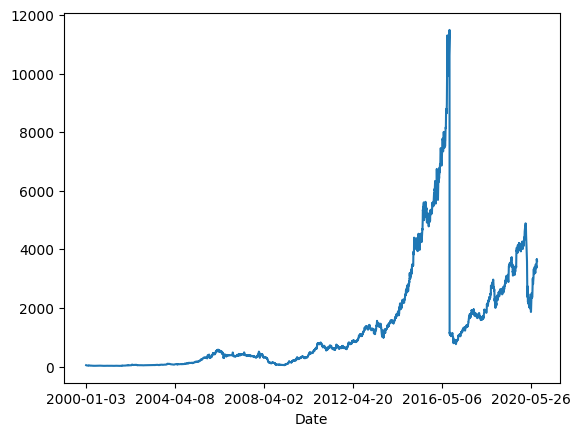

In [73]:
df['VWAP'].plot()

In [74]:
df.shape

(5070, 14)

In [75]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [78]:
df.shape

(2291, 14)

In [79]:
data=df.copy()

In [80]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [81]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [82]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [83]:
for feature in lag_features:
  data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
  data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [84]:
for feature in lag_features:
  data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
  data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [85]:
  data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [86]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [87]:
data.shape

(2291, 34)

In [88]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [89]:
data.dropna(inplace=True)

In [90]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [91]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [92]:
training_data=data[0:1800]
test_data=data[1800:]

In [93]:
training_data.shape

(1800, 34)

In [95]:
from pmdarima import auto_arima

In [97]:
model=auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.550, Time=2.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.236, Time=1.80 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.360, Time=1.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.332, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.77 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.246, Time=2.40 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 12.522 seconds


c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [101]:
model

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [115]:
forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [116]:
np.array(forecast)

array([2600.73186544, 2625.13546767, 2600.97787595, 2556.4075677 ,
       2572.87387155, 2509.1660748 , 2223.58199017, 2289.36027608,
       2479.58701106, 2279.11037103, 2185.04713624, 2117.30691249,
       2083.30533992, 2153.56590502, 2115.95278048, 2030.2201691 ,
       1924.94856719, 1981.26207673, 2025.66596282, 2084.56965813,
       2139.77296498, 2060.63956364, 2186.22480665, 2156.70491828,
       2106.65882785, 2157.81217542, 2076.29881575, 2211.75401058,
       2240.62691415, 2243.59226669, 2296.74902953, 2304.57891462,
       2325.24051135, 2380.31065076, 2336.01093817, 2341.36772172,
       2335.78302411, 2317.08491433, 2325.52328496, 2292.50650486,
       2312.3627023 , 2328.50494103, 2309.42961457, 2355.84629078,
       2343.80109807, 2377.6256626 , 2385.30488713, 2372.61506792,
       2382.24997514, 2378.84165822, 2384.72689036, 2447.67483219,
       2457.45542286, 2482.93018002, 2507.47577992, 2494.45332166,
       2452.94264661, 2441.7398605 , 2428.13537162, 2377.58231

In [117]:
test_data['Forecast_ARIMA'] = np.array(forecast)

C:\Users\modern14\AppData\Local\Temp\ipykernel_26752\3776187401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast_ARIMA'] = np.array(forecast)


In [118]:
test_data.Forecast_ARIMA

Date
2018-09-11    2600.731865
2018-09-12    2625.135468
2018-09-14    2600.977876
2018-09-17    2556.407568
2018-09-18    2572.873872
                 ...     
2020-08-25    3447.668442
2020-08-26    3677.805364
2020-08-27    3685.069547
2020-08-28    3583.729137
2020-08-31    3392.960109
Name: Forecast_ARIMA, Length: 485, dtype: float64

<Axes: xlabel='Date'>

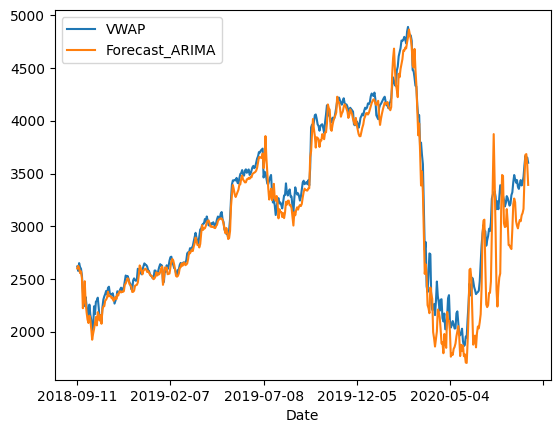

In [119]:
test_data[['VWAP', 'Forecast_ARIMA']].plot()

In [120]:
# checking accuracy

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [124]:
np.sqrt(mean_squared_error(test_data.VWAP, test_data.Forecast_ARIMA))

187.7776959907358

In [125]:
mean_absolute_error(test_data.VWAP, test_data.Forecast_ARIMA)

124.65325060072023